  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K
efficiency: 0.08226633443390167


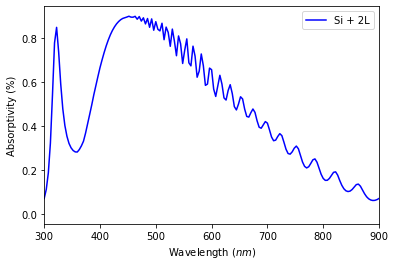

In [1]:
from numpy import random
from wptherml.wpml import multilayer
from wptherml.datalib import datalib
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import basinhopping
import numpy as np
import time

### Define a 2 micron silicon slab with a SiO2 and AlN coating...
### we will optimize over the SiO2 and AlN coatings only.
### Si with 2-layer AR coating
dof2_structure = {
        'Material_List' : ['Air', 'AlN', 'SiO2', 'AlN','SiO2', 'Si','Air'],
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 4e-9, 49e-9, 38e-9, 10e-9, 2000e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000]
        }
#4nmaluminumnitride,49nmsilicondioxide,38nmaluminumnitride,10nmsilicondioxide,2000nmsilicon.
pv_2l = multilayer(dof2_structure)
pv_2l.pv_conversion_efficiency()
print("efficiency:",pv_2l.conversion_efficiency_val)
plt.plot(pv_2l.lambda_array*1e9, pv_2l.emissivity_array, 'blue', label='Si + 2L')
plt.xlim(300,900)
plt.ylabel('Absorptivity (%)')
plt.xlabel('Wavelength ($nm$)')
plt.legend()

def update_pv_efficiency(d1, d2, d3, d4):
    pv_2l.d[1] = d1 * 1e-9
    pv_2l.d[2] = d2 * 1e-9
    pv_2l.d[3] = d3 * 1e-9
    pv_2l.d[4] = d4 * 1e-9
    pv_2l.fresnel()
    pv_2l.pv_conversion_efficiency()
    return pv_2l.conversion_efficiency_val


In [14]:
print(update_pv_efficiency(4, 49, 38, 10))

0.08226633443390167


In [2]:
dl = np.linspace(1,200,200)
f = open('pv_4_layer.csv', 'w')
g = open('pv_4_layer.dat', 'w')
base_str = "4, 49, "
for da in dl:
    for db in dl:
        val = update_pv_efficiency(4, 49, da, db)
        csv_str = base_str + str(da) + ", " + str(db) + ", " + str(val) + "\n"
        f.write(csv_str)
        g.write(csv_str)
    g.write("\n")
    
f.close()
g.close()

In [ ]:

dim = 10000

f = open('pv_large.csv', 'w')
for i in range(0, dim):
    d1, d2, d3, d4, pv_2l.conversion_efficiency_val = update_pv_efficiency(1.0, 2.0, 3.0, 4.0, rand=True)
    #print(d1, d2, d3, d4, pv_2l.conversion_efficiency_val)
    pr_str = str(d1) + ", " + str(d2) + ", " + str(d3) + ", "
    pr_str += str(d4) + ", " + str(pv_2l.conversion_efficiency_val)
    pr_str += "\n"
    f.write(pr_str)
    
f.close()
        